# Import libraries

In [4]:
import os
import csv
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate RMS and plot histogram

In [5]:
def calculate_rms(df, title):
    df_copy = pd.DataFrame(df)
    rms_values = np.sqrt(np.sum(df_copy**2, axis=1))
    df_copy['RMS'] = rms_values

    # Plot histogram
    plt.style.use('ggplot')
    plt.hist(df_copy['RMS'], bins=[0, 4, 8, 12, 16, 20, 24, 28, 32, 36], color="slategrey")
    plt.title(f'Histogram of {title}')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.show()

# Function to merge CSV files and process each scenario
def process_scenario(dir_bf, dir_radar, dir_velodyne, avg_dir_bf, avg_dir_radar, avg_dir_velodyne, title):
    # Helper function to merge CSV files from a directory
    def merge_csv_files(input_dir, output_file):
        csv_file_list = glob.glob(os.path.join(input_dir, '*.csv'))
        if len(csv_file_list) == 0:
            print(f"No CSV files found in the directory: {input_dir}")
            raise FileNotFoundError(f"No CSV files found in the directory: {input_dir}")
        #else:
            #print(f"Files found: {csv_file_list}")  # Debugging statement to check files
        with open(output_file, 'w', newline='') as f:
            wf = csv.writer(f, lineterminator='\n')
            for file in csv_file_list:
                with open(file, 'r') as r:
                    rr = csv.reader(r)
                    for row in rr:
                        wf.writerow(row)

    # Merge CSV files for Blickfeld, Radar, and Velodyne
    try:
        merge_csv_files(dir_bf, avg_dir_bf)
        merge_csv_files(dir_radar, avg_dir_radar)
        merge_csv_files(dir_velodyne, avg_dir_velodyne)
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return

    # Read the merged CSV files into DataFrames (header=None if no header)
    try:
        df_bf = pd.read_csv(avg_dir_bf, sep=' ', header=None)
        df_radar = pd.read_csv(avg_dir_radar, sep=' ', header=None)
        df_velodyne = pd.read_csv(avg_dir_velodyne, sep=' ', header=None)
    except Exception as e:
        print(f"Error reading CSV files: {e}")
        return

    # Drop unnecessary columns (adjust based on actual file structure)
    df_bf.drop(df_bf.columns[-2:], axis=1, inplace=True)  # Assuming last two columns are to be dropped
    df_radar.drop(df_radar.columns[-2:], axis=1, inplace=True)
    df_velodyne.drop(df_velodyne.columns[-3:], axis=1, inplace=True)

    # Calculate RMS and plot histograms
    calculate_rms(df_bf, f'Blickfeld sensor {title}')
    calculate_rms(df_radar, f'Radar sensor {title}')
    calculate_rms(df_velodyne, f'Velodyne sensor {title}')

# Fog Scenario

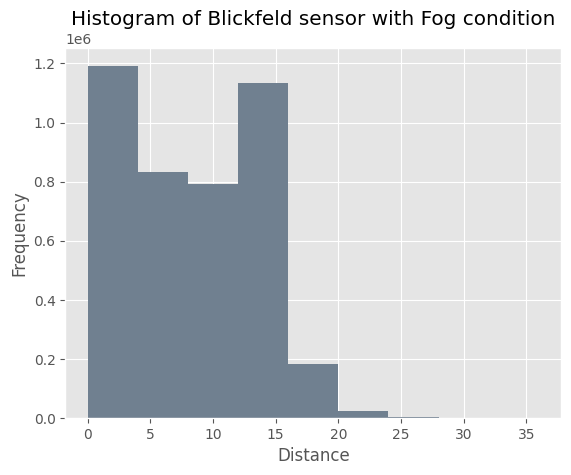

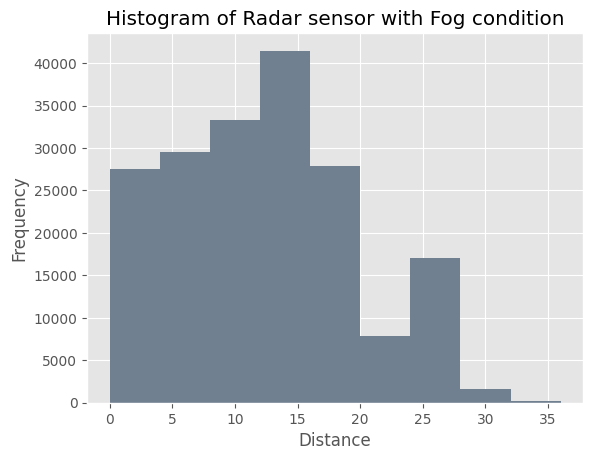

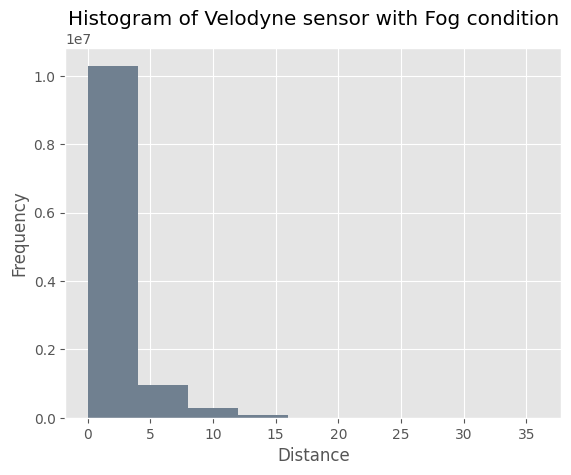

In [6]:
# Directory paths for "fog" scenario
dir_bf_fog = "./CBuilding/csv/c_building_pedestrian_fog_anon/blickfeld"
dir_radar_fog = "./CBuilding/csv/c_building_pedestrian_fog_anon/radar"
dir_velodyne_fog = "./CBuilding/csv/c_building_pedestrian_fog_anon/velodyne"

# Output paths for "fog" scenario (these will be generated as new files)
avg_dir_bf_fog = "./output_fog/Output_bf_fog.csv"
avg_dir_radar_fog = "./output_fog/Output_radar_fog.csv"
avg_dir_velodyne_fog = "./output_fog/Output_velodyne_fog.csv"

# Process "fog" scenario
process_scenario(dir_bf_fog, dir_radar_fog, dir_velodyne_fog, avg_dir_bf_fog, avg_dir_radar_fog, avg_dir_velodyne_fog, 'with Fog condition')


# Clear Scenario

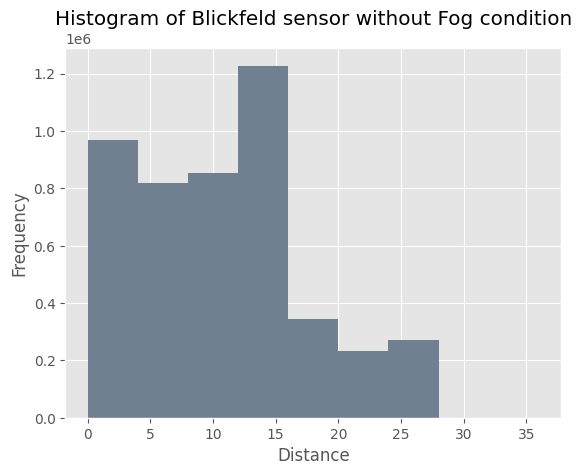

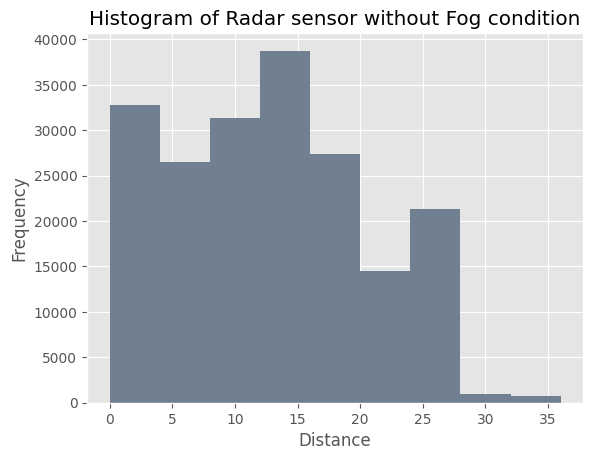

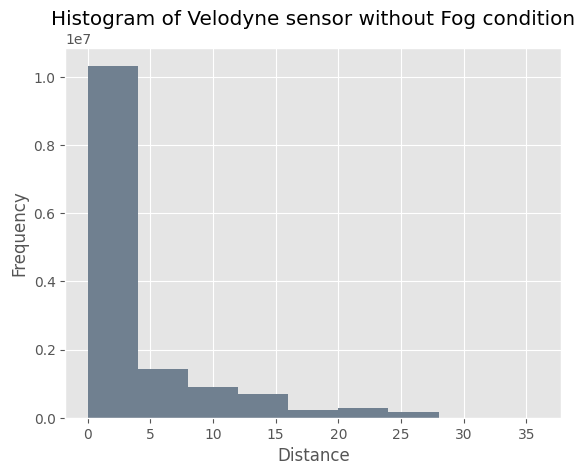

In [7]:
# Directory paths for "clear" scenario
dir_bf_clear = "./CBuilding/csv/c_building_pedestrian_clear_anon/blickfeld"
dir_radar_clear = "./CBuilding/csv/c_building_pedestrian_clear_anon/radar"
dir_velodyne_clear = "./CBuilding/csv/c_building_pedestrian_clear_anon/velodyne"

# Output paths for "clear" scenario (these will be generated as new files)
avg_dir_bf_clear = "./output_clear/Output_bf_clear.csv"
avg_dir_radar_clear = "./output_clear/Output_radar_clear.csv"
avg_dir_velodyne_clear = "./output_clear/Output_velodyne_clear.csv"

# Process "clear" scenario
process_scenario(dir_bf_clear, dir_radar_clear, dir_velodyne_clear, avg_dir_bf_clear, avg_dir_radar_clear, avg_dir_velodyne_clear, 'without Fog condition')